From Clustering to Classification:

Oftentimes we receive a data set that is not yet suited for supervised machine learning because it lacks the necessary target. In these cases, we can sometimes use clustering to extrapolate categories and then use the cluster labels for downstream classification. For this challenge, we'd like to see how you do at this kind of task.
Create a fresh Python project (either .py or .ipynb) that does the following:

•	 Downloads a clustering data set from the UCI Machine Learning Repository.

•	 Performs clustering on the data. Note: **Please include an explanation of why you selected that particular clustering algorithm for this problem.**

•	 **Plots the clusters and provides a textual interpretation of the results.**

•	 Transforms the cluster labels into target variables for classification.

•	 Performs classification on the data using the new categorical target values. **Note: please include an explanation of why you selected that particular classification algorithm.**

•	 **Evaluates the performance of the classifier and provides some textual interpretation.**

•	 **Includes a sketched-out diagram (e.g. using Google draw or on paper/whiteboard) of a pipeline that integrates the above steps so that the model could be rebuilt on demand (e.g. in a production environment).**

Save your file(s), upload them to a Github repository, and send us the link!

### MY TASK

This dataset contains 206 attributes of 70 children with physical and motor disability based on ICF-CY.
In particular, the SCADI dataset is the only one that has been used by ML researchers for self-care problems classification based on ICF-CY to this date.
The 'Class' field refers to the presence of the self-care problems of the children with physical and motor disabilities.The classes are determined by occupational therapists.


Attribute Information:

1: gender: gender (1 = male; 0 = female)

2: age: age in years

3-205: self-care activities based on ICF-CY (1 = The case has this feature; 0 = otherwise)

206: Classes ( class1 = Caring for body parts problem; class2 = Toileting problem; class3 = Dressing problem; class4 = Washing oneself and Caring for body parts and Dressing problem; class5 = Washing oneself, Caring for body parts, Toileting, and Dressing problem; class6 = Eating, Drinking, Washing oneself, Caring for body parts, toileting,Dressing, Looking after one's health and Looking after one's safety problem; class7 = No Problem; )



In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.classifier import ClassificationReport, ROCAUC, ClassBalance,  ConfusionMatrix

from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import scipy.cluster.hierarchy as shc

In [41]:
df = pd.read_csv("../data/SCADI.csv")
df.head()

,Gender,Age,d 5100-0,d 5100-1,d 5100-2,d 5100-3,d 5100-4,d 5100-8,d 5100-9,d 5101-0,...,d 57022-8,d 57022-9,d 571-0,d 571-1,d 571-2,d 571-3,d 571-4,d 571-8,d 571-9,Classes
0,0,18,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,class6
1,0,22,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,class6
2,0,18,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,class6
3,1,18,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,class6
4,0,19,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,class6


In [42]:
df['Gender'] = pd.Categorical(df['Gender'])
df['Age'] = pd.to_numeric(df['Age'])
df['Classes'] = df['Classes'].str.replace('class','')
df['Classes'] = pd.Categorical(df['Classes'])

df.head()

,Gender,Age,d 5100-0,d 5100-1,d 5100-2,d 5100-3,d 5100-4,d 5100-8,d 5100-9,d 5101-0,...,d 57022-8,d 57022-9,d 571-0,d 571-1,d 571-2,d 571-3,d 571-4,d 571-8,d 571-9,Classes
0,0,18,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,6
1,0,22,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,6
2,0,18,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,6
3,1,18,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,6
4,0,19,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,6


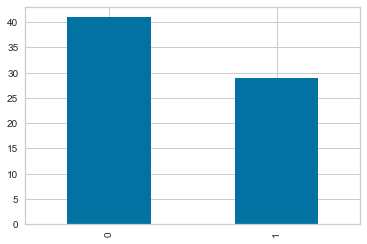

In [48]:
df['Gender'].value_counts().plot(kind='bar')

<u>Clustering:</u>

- [Data cleaning and exploratory analysis](Datacleaningandexploratoryanalysis)

- Feature Engineering
- Clustering - Dendrogram (find no of clusters)
    - Hierarchical clustering
- Visualize clusters using t-sne
- Identify cluster features

<u>Classification:</u>
- Classification on features vs target label (cluster)
- Evaluation of model
- Save model for future use

- [hi](hi)
----

#### Data cleaning and exploratory analysis

### Data is sparse - use truncated SVD to reduce features to 50

In [43]:
df_tsvd = df.copy()
tsvd = TruncatedSVD(n_components=50,random_state=40)

# Conduct TSVD on sparse matrix
features_sparse_tsvd = tsvd.fit(df_tsvd).transform(df_tsvd)

# Show results
print("Original number of features:", df_tsvd.shape[1])
print("Reduced number of features:", features_sparse_tsvd.shape[1]) 
print("Total Variance", tsvd.explained_variance_ratio_.sum())

Original number of features: 206
Reduced number of features: 50
Total Variance 0.997368053105751


In [44]:
features_sparse_tsvd

array([[ 1.93113588e+01, -4.51268865e-01, -2.74915018e+00, ...,
         8.90968742e-02,  9.39022465e-02,  9.23550649e-02],
       [ 2.30288934e+01,  9.93368680e-01, -3.28972418e+00, ...,
         1.23769952e-01, -4.46719234e-03,  8.90660071e-02],
       [ 1.93537932e+01,  3.70027247e-01, -1.88553497e+00, ...,
        -1.40446880e-01,  9.41328941e-02, -8.85963915e-02],
       ...,
       [ 1.01298366e+01, -2.59149742e+00,  2.30757461e-01, ...,
         1.36176958e-01,  9.41321467e-02, -9.39643489e-02],
       [ 1.00475120e+01, -3.10275453e+00, -4.79408934e-01, ...,
        -2.38746068e-02, -2.32965294e-02,  6.68204355e-02],
       [ 1.55460081e+01, -1.25251141e+00, -1.54816562e+00, ...,
         9.52800714e-03,  4.85089472e-02,  2.31360491e-02]])

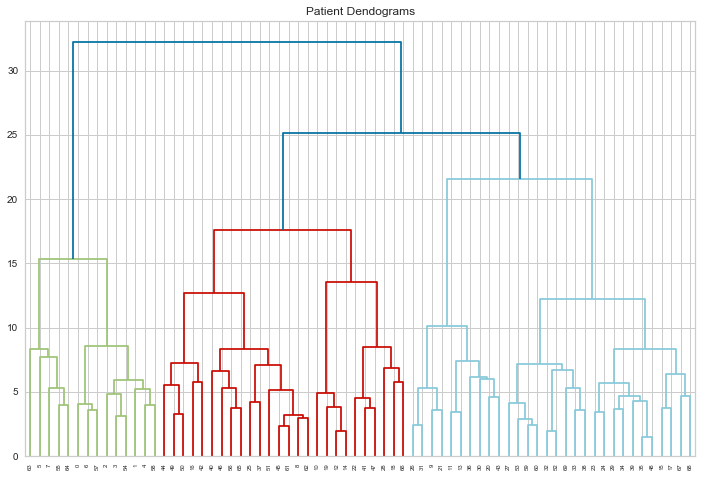

In [45]:
plt.figure(figsize=(12, 8))
plt.title("Patient Dendograms")
dend = shc.dendrogram(shc.linkage(features_sparse_tsvd, method='ward'),orientation='top')

In [8]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster_pred = cluster.fit_predict(features_sparse_tsvd)

[t-SNE] Computing 69 nearest neighbors...
[t-SNE] Indexed 70 samples in 0.000s...
[t-SNE] Computed neighbors for 70 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 70 / 70
[t-SNE] Mean sigma: 4.580890
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.781540
[t-SNE] KL divergence after 300 iterations: 0.706195


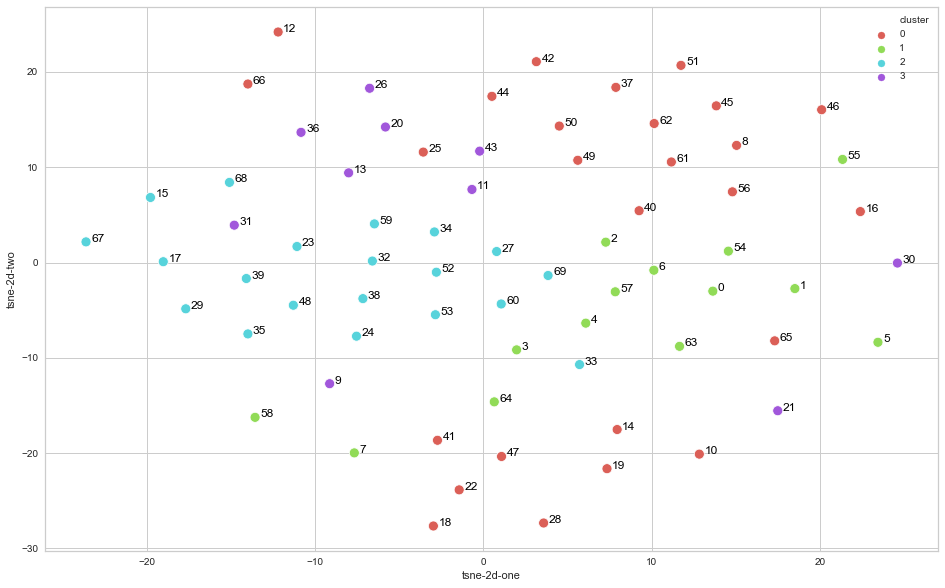

In [30]:
features_sparse_tsvd_df = pd.DataFrame(features_sparse_tsvd)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=100)
tsne_results = tsne.fit_transform(features_sparse_tsvd_df)
features_sparse_tsvd_df['tsne-2d-one'] = tsne_results[:,0]
features_sparse_tsvd_df['tsne-2d-two'] = tsne_results[:,1]


features_sparse_tsvd_df['cluster'] = cluster_pred
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster",
    palette=sns.color_palette("hls", 4),
    data=features_sparse_tsvd_df,
    legend="full",
    alpha=1,
    s=100
)
for line in range(0,features_sparse_tsvd_df.shape[0]):
     plt.text(features_sparse_tsvd_df["tsne-2d-one"][line]+.3, features_sparse_tsvd_df["tsne-2d-two"][line], 
              features_sparse_tsvd_df.index.values[line], horizontalalignment='left', 
              size='large', color='black')
        

In [10]:
df_tsvd['Cluster'] = cluster_pred
df_tsvd.head()

,Gender,Age,d 5100-0,d 5100-1,d 5100-2,d 5100-3,d 5100-4,d 5100-8,d 5100-9,d 5101-0,...,d 57022-9,d 571-0,d 571-1,d 571-2,d 571-3,d 571-4,d 571-8,d 571-9,Classes,Cluster
0,0,18,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,6,1
1,0,22,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,6,1
2,0,18,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,6,1
3,1,18,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,6,1
4,0,19,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,6,1


In [11]:
#Avg age per cluster
print ("Average age per cluster\n", df_tsvd.groupby('Cluster')['Age'].mean())
#Gender 1-male, 2-female
print ("\nGender per cluster\n", df_tsvd.groupby('Cluster')['Gender'].value_counts())

Average age per cluster
 Cluster
0    11.653846
1    17.500000
2    11.100000
3     8.800000
Name: Age, dtype: float64

Gender per cluster
 Cluster  Gender
0        1         14
         0         12
1        0         10
         1          4
2        0         14
         1          6
3        0          5
         1          5
Name: Gender, dtype: int64


In [12]:
#Classes per cluster
#( class1 = Caring for body parts problem; class2 = Toileting problem; class3 = Dressing problem; 
#class4 = Washing oneself and Caring for body parts and Dressing problem; 
#class5 = Washing oneself, Caring for body parts, Toileting, and Dressing problem; 
#class6 = Eating, Drinking, Washing oneself, Caring for body parts, toileting,Dressing, 
#Looking after one's health and Looking after one's safety problem; class7 = No Problem; )

print ("\nClasses per cluster\n", df_tsvd.groupby('Cluster')['Classes'].value_counts())


Classes per cluster
 Cluster  Classes
0        4          11
         7           5
         2           4
         1           2
         5           2
         3           1
         6           1
1        6           9
         2           3
         4           1
         7           1
2        6          19
         5           1
3        7          10
Name: Classes, dtype: int64


### Use the cluster to make classification

Distribution of Classes


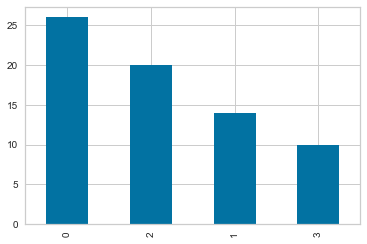

In [13]:
print ('Distribution of Classes')
df_tsvd.Cluster.value_counts().plot(kind='bar')
plt.show()

In [14]:
X,y = features_sparse_tsvd, df_tsvd['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=40)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (42, 50)
Training Labels Shape: (42,)
Testing Features Shape: (28, 50)
Testing Labels Shape: (28,)


In [15]:
clf=RandomForestClassifier(n_estimators=100, random_state=40)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8571428571428571


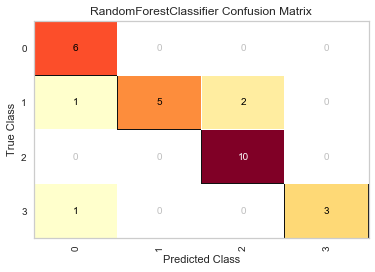

In [17]:
visualizer = ConfusionMatrix(clf)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)
g = visualizer.poof()

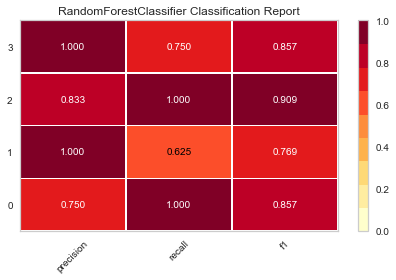

In [18]:
visualizer = ClassificationReport(clf)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()

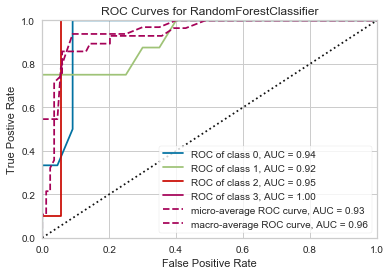

In [19]:
visualizer = ROCAUC(clf)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)
g = visualizer.poof()  

In [38]:
df = pd.read_csv("../data/SCADI.csv")

df['Gender'] = pd.Categorical(df['Gender'])
df['Age'] = pd.to_numeric(df['Age'])
df['Classes'] = df['Classes'].str.replace('class','')
df['Classes'] = pd.Categorical(df['Classes'])

df_tsvd = df.copy()

class ModelPlots:
    def plot_dendogram(self):
        
        plt.figure(figsize=(12, 8))
        plt.title("Patient Dendograms")
        dend = shc.dendrogram(shc.linkage(self.features_tsvd, method='ward'), orientation='top')
#         plt.savefig('../docs/dendogram.png')
        plt.show()
    
    def plot_classifier_metrics(self):

        fig, axes = plt.subplots(2, 2, figsize=(12, 8))

        visualgrid = [
            ConfusionMatrix(self.clf, ax=axes[0][0]),
            ClassificationReport(self.clf, ax=axes[0][1]),
            ROCAUC(self.clf, ax=axes[1][0]),
        ]
        fig.delaxes(axes[1, 1])
        for viz in visualgrid:
            viz.fit(self.X_train, self.y_train)
            viz.score(self.X_test, self.y_test)
            viz.finalize()
#         plt.savefig('../docs/metrics_classifier.png')
        plt.show()
    
    def plot_clusters(self):
        plt.figure(figsize=(12, 8))
        sns.scatterplot(
            x="tsne-2d-one", y="tsne-2d-two",
            hue="cluster",
            palette=sns.color_palette("hls", 4),
            data=self.features_sparse_tsvd_df,
            legend="full",
            alpha=1,
            s=100
        )
        for line in range(0, self.features_sparse_tsvd_df.shape[0]):
            plt.text(self.features_sparse_tsvd_df["tsne-2d-one"][line] + .3, self.features_sparse_tsvd_df["tsne-2d-two"][line],
                     self.features_sparse_tsvd_df.index.values[line], horizontalalignment='left',
                     size='large', color='black')

#         plt.savefig('../docs/clusters.png')
        plt.show()

class ClusterClassify(ModelPlots):
    
    def __init__(self, features_tsvd = None, clf = None):
        self.features_tsvd = None
        self.clf = RandomForestClassifier(n_estimators=100, random_state=40)
        
    def get_feature_reduce(self, df):

        tsvd = TruncatedSVD(n_components=50, random_state=40)

        # Conduct TSVD on sparse matrix
        features_sparse_tsvd = tsvd.fit(df).transform(df)

        # Show results
        print("Original number of features:", df.shape[1])
        print("Reduced number of features:", features_sparse_tsvd.shape[1])
        print("Total Variance captured:", tsvd.explained_variance_ratio_.sum())

        self.features_tsvd = features_sparse_tsvd
    
    def get_clusters(self):

        cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
        cluster_pred = cluster.fit_predict(self.features_tsvd)

        features_sparse_tsvd_df = pd.DataFrame(self.features_tsvd)
        tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=100)
        tsne_results = tsne.fit_transform(features_sparse_tsvd_df)
        features_sparse_tsvd_df['tsne-2d-one'] = tsne_results[:,0]
        features_sparse_tsvd_df['tsne-2d-two'] = tsne_results[:,1]

        features_sparse_tsvd_df['cluster'] = cluster_pred
        self.features_sparse_tsvd_df = features_sparse_tsvd_df
        
        
        df['Cluster'] = cluster_pred

        # Avg age per cluster
        print("Average age per cluster\n", df.groupby('Cluster')['Age'].mean())
        # Gender 1-male, 2-female
        print("\nGender per cluster\n", df.groupby('Cluster')['Gender'].value_counts())
        print("\nClasses per cluster\n", df.groupby('Cluster')['Classes'].value_counts())

        self.df = df
    
    def get_test_train(self):

        X, y = self.features_tsvd, self.df['Cluster']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=40)
        
        print('Training Features Shape:', X_train.shape)
        print('\nTraining Labels Shape:', y_train.shape)
        print('\nTesting Features Shape:', X_test.shape)
        print('\nTesting Labels Shape:', y_test.shape)

        self.X_train, self.y_train, self.X_test, self.y_test = X_train, y_train, X_test, y_test 
    
    def get_model_accuracy(self):
        
        self.clf.fit(self.X_train, self.y_train)
        y_pred = self.clf.predict(self.X_test)
        print("\nModel Accuracy %:", np.round(metrics.accuracy_score(self.y_test, y_pred)*100,2))
    
    def run_phases(self):
        phases = (self.plot_dendogram(), self.get_clusters(),
                 self.plot_clusters(), self.get_test_train(),
                 self.plot_classifier_metrics(), self.get_model_accuracy())
        for phase in phases:
            phase


Original number of features: 206
Reduced number of features: 50
Total Variance 0.997368053105751


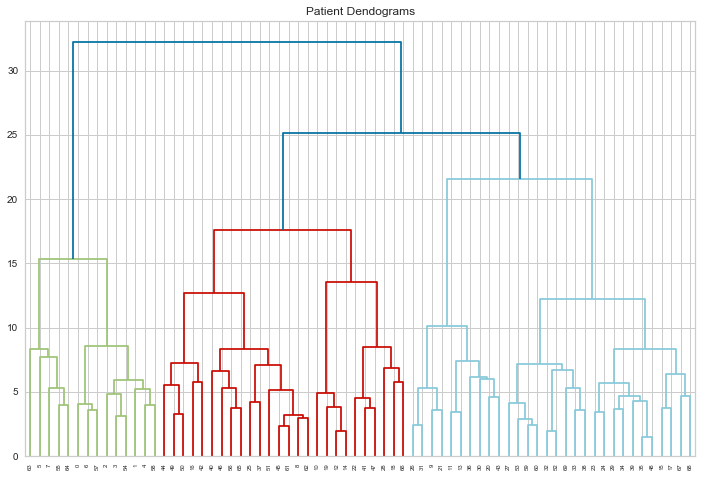

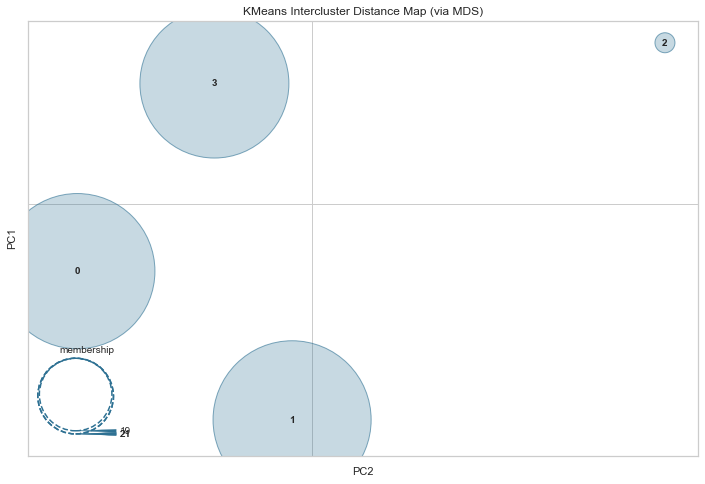

[t-SNE] Computing 69 nearest neighbors...
[t-SNE] Indexed 70 samples in 0.000s...
[t-SNE] Computed neighbors for 70 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 70 / 70
[t-SNE] Mean sigma: 4.580890
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.781540
[t-SNE] KL divergence after 300 iterations: 0.706195
Average age per cluster
 Cluster
0    11.653846
1    17.500000
2    11.100000
3     8.800000
Name: Age, dtype: float64

Gender per cluster
 Cluster  Gender
0        1         14
         0         12
1        0         10
         1          4
2        0         14
         1          6
3        0          5
         1          5
Name: Gender, dtype: int64

Classes per cluster
 Cluster  Classes
0        4          11
         7           5
         2           4
         1           2
         5           2
         3           1
         6           1
1        6           9
         2           3
         4           1
         7   

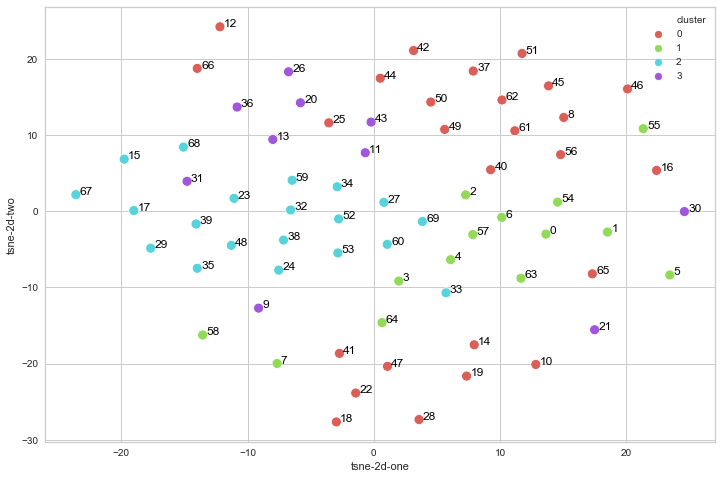

Training Features Shape: (42, 50)
Training Labels Shape: (42,)
Testing Features Shape: (28, 50)
Testing Labels Shape: (28,)


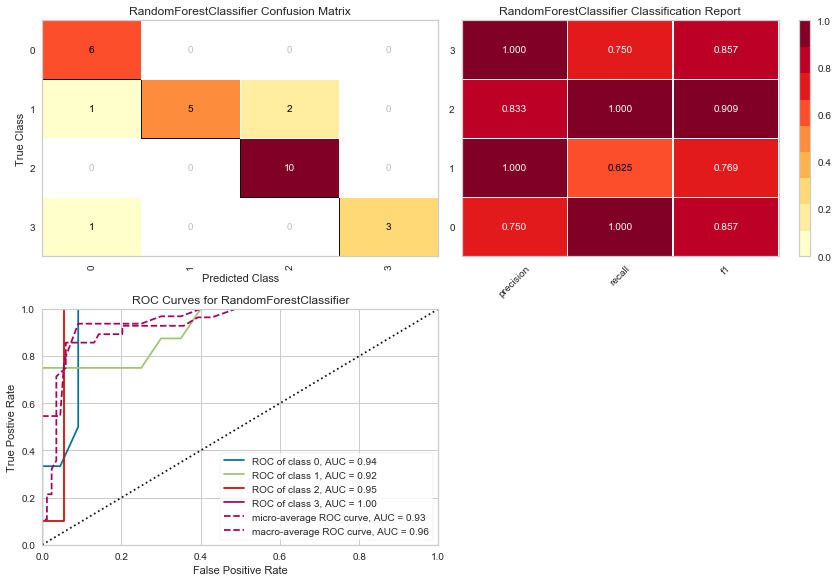

Accuracy %: 85.71


In [39]:
clf = ClusterClassify()
clf.get_feature_reduce(df_tsvd)
# clf.plot_dendogram()
clf.run_phases()